In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lats_lngs = zip(lats,lngs)
lats_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | luanda
Processing Record 2 of Set 1 | montrose
Processing Record 3 of Set 1 | chicama
Processing Record 4 of Set 1 | montelibano
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | severo-kurilsk
Processing Record 7 of Set 1 | naze
Processing Record 8 of Set 1 | hofn
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | acarau
Processing Record 12 of Set 1 | lagoa
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | namibe
Processing Record 15 of Set 1 | mutare
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | zhuhai
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | uray
Processing Record 22 of Set 1 | mataura
Processing Record 23 of Se

Processing Record 41 of Set 4 | progreso
Processing Record 42 of Set 4 | kindu
Processing Record 43 of Set 4 | porgera
Processing Record 44 of Set 4 | huarmey
Processing Record 45 of Set 4 | zabaykalsk
Processing Record 46 of Set 4 | sola
Processing Record 47 of Set 4 | haicheng
Processing Record 48 of Set 4 | hutchinson
Processing Record 49 of Set 4 | guerrero negro
Processing Record 50 of Set 4 | kangaatsiaq
Processing Record 1 of Set 5 | cartagena
Processing Record 2 of Set 5 | nanortalik
Processing Record 3 of Set 5 | rawannawi
City not found. Skipping...
Processing Record 4 of Set 5 | norman wells
Processing Record 5 of Set 5 | mega
Processing Record 6 of Set 5 | chavakkad
Processing Record 7 of Set 5 | kerteh
City not found. Skipping...
Processing Record 8 of Set 5 | tiarei
Processing Record 9 of Set 5 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 5 | carnarvon
Processing Record 11 of Set 5 | svetlyy
Processing Record 12 of Set 5 | saskylakh
Processing Recor

Processing Record 27 of Set 8 | panna
Processing Record 28 of Set 8 | portland
Processing Record 29 of Set 8 | orodara
Processing Record 30 of Set 8 | broken hill
Processing Record 31 of Set 8 | alberton
Processing Record 32 of Set 8 | lexington park
Processing Record 33 of Set 8 | hammerfest
Processing Record 34 of Set 8 | darhan
Processing Record 35 of Set 8 | luderitz
Processing Record 36 of Set 8 | cururupu
Processing Record 37 of Set 8 | luorong
Processing Record 38 of Set 8 | fort nelson
Processing Record 39 of Set 8 | acapulco
Processing Record 40 of Set 8 | mahibadhoo
Processing Record 41 of Set 8 | choa saidan shah
Processing Record 42 of Set 8 | ozinki
Processing Record 43 of Set 8 | flin flon
Processing Record 44 of Set 8 | yanan
City not found. Skipping...
Processing Record 45 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 46 of Set 8 | saint anthony
Processing Record 47 of Set 8 | klerksdorp
Processing Record 48 of Set 8 | kalomo
City not found. Skippin

Processing Record 16 of Set 12 | trelew
Processing Record 17 of Set 12 | san patricio
Processing Record 18 of Set 12 | shingu
Processing Record 19 of Set 12 | general cepeda
Processing Record 20 of Set 12 | sangar
Processing Record 21 of Set 12 | amuntai
Processing Record 22 of Set 12 | shawnee
Processing Record 23 of Set 12 | novyy urengoy
Processing Record 24 of Set 12 | paciran
Processing Record 25 of Set 12 | shimanovsk
Processing Record 26 of Set 12 | genhe
Processing Record 27 of Set 12 | dawlatabad
Processing Record 28 of Set 12 | primorsk
Processing Record 29 of Set 12 | vanimo
Processing Record 30 of Set 12 | bonfim
Processing Record 31 of Set 12 | yulin
Processing Record 32 of Set 12 | lillooet
Processing Record 33 of Set 12 | wanganui
Processing Record 34 of Set 12 | kendari
Processing Record 35 of Set 12 | bria
Processing Record 36 of Set 12 | verkhoyansk
Processing Record 37 of Set 12 | tateyama
Processing Record 38 of Set 12 | sioux lookout
Processing Record 39 of Set 12 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Luanda,-8.8368,13.2343,77.00,78,75,9.22,AO,2022-09-29 14:21:25
1,Montrose,38.4166,-108.2673,49.53,54,100,4.52,US,2022-09-29 14:26:22
2,Chicama,-7.8447,-79.1469,57.74,74,95,7.63,PE,2022-09-29 14:26:22
3,Montelibano,7.9829,-75.4229,80.51,79,44,3.36,CO,2022-09-29 14:26:22
4,Puerto Ayora,-0.7393,-90.3518,69.76,95,89,4.00,EC,2022-09-29 14:26:23
5,Severo-Kurilsk,50.6789,156.1250,47.41,77,32,24.40,RU,2022-09-29 14:26:23
6,Naze,28.3667,129.4833,74.32,76,2,8.75,JP,2022-09-29 14:26:23
7,Hofn,64.2539,-15.2082,44.62,93,100,8.05,IS,2022-09-29 14:21:53
8,Bluff,-46.6000,168.3333,42.80,55,5,7.38,NZ,2022-09-29 14:26:24
9,Punta Arenas,-53.1500,-70.9167,48.31,66,75,14.97,CL,2022-09-29 14:26:24


In [10]:
#Reorder DataFrame
new_column_order = ["City","Country","Date", "Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Luanda,AO,2022-09-29 14:21:25,-8.8368,13.2343,77.00,78,75,9.22
1,Montrose,US,2022-09-29 14:26:22,38.4166,-108.2673,49.53,54,100,4.52
2,Chicama,PE,2022-09-29 14:26:22,-7.8447,-79.1469,57.74,74,95,7.63
3,Montelibano,CO,2022-09-29 14:26:22,7.9829,-75.4229,80.51,79,44,3.36
4,Puerto Ayora,EC,2022-09-29 14:26:23,-0.7393,-90.3518,69.76,95,89,4.00
5,Severo-Kurilsk,RU,2022-09-29 14:26:23,50.6789,156.1250,47.41,77,32,24.40
6,Naze,JP,2022-09-29 14:26:23,28.3667,129.4833,74.32,76,2,8.75
7,Hofn,IS,2022-09-29 14:21:53,64.2539,-15.2082,44.62,93,100,8.05
8,Bluff,NZ,2022-09-29 14:26:24,-46.6000,168.3333,42.80,55,5,7.38
9,Punta Arenas,CL,2022-09-29 14:26:24,-53.1500,-70.9167,48.31,66,75,14.97


In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

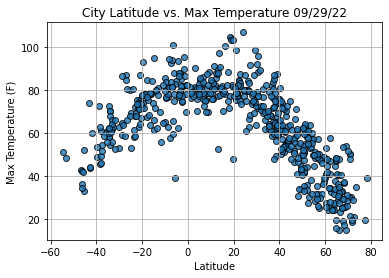

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

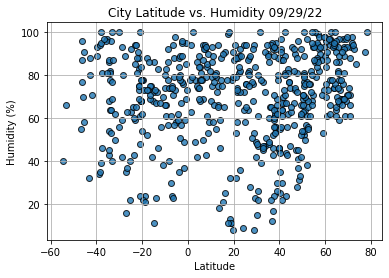

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

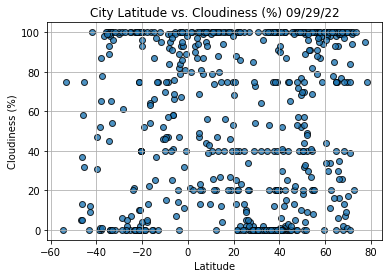

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

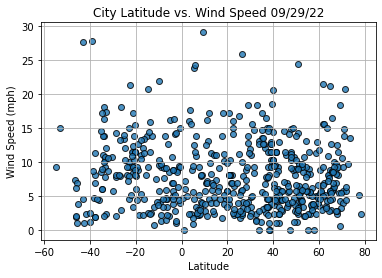

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [24]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Luanda,AO,2022-09-29 14:21:25,-8.8368,13.2343,77.00,78,75,9.22
1,1,Montrose,US,2022-09-29 14:26:22,38.4166,-108.2673,49.53,54,100,4.52
2,2,Chicama,PE,2022-09-29 14:26:22,-7.8447,-79.1469,57.74,74,95,7.63
3,3,Montelibano,CO,2022-09-29 14:26:22,7.9829,-75.4229,80.51,79,44,3.36
4,4,Puerto Ayora,EC,2022-09-29 14:26:23,-0.7393,-90.3518,69.76,95,89,4.00


In [25]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [34]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]

# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]

# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)

# Add the heatmap layer.
fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [35]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [36]:
# Heatmap of percent Cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [37]:
# Heatmap of Windspeed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))